# Occurence Probability by Latitude and Strength
The following notebook describes how to bin dBr/dt by latitude and strength in order to produce Figure 5
The steps to the dBr/dt file are in the notebook "Creating_Delta_File"

In [1]:
%matplotlib notebook
import pandas as pd
import vaex as vx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
mlats= np.linspace(49, 81, 50)
diff= np.diff(mlats)[0]

In [3]:
data= pd.read_csv('DeltaBr.csv', index_col=0, parse_dates=['Date_UTC'])

In [4]:
Br= [f'dBr_{i}' for i in range(50)]
dBr= []
mlat= []
date= []
mlt= []
for i, m in enumerate(mlats):
    dBr.append(data[f'dBr_{i}'].values)
    mlat.append([m]*len(data[f'dBr_{i}']))
    date.append(data.Date_UTC.values)
    mlt.append(data.MLT.values)
mlat=np.array(mlat).flatten()
dBr=np.array(dBr).flatten()
date=np.array(date).flatten()
mlt=np.array(mlt).flatten()
data= vx.from_arrays(mlat=mlat, dBrdt=dBr*1e9, Date_UTC=date, mlt=mlt)

<IPython.core.display.Javascript object>


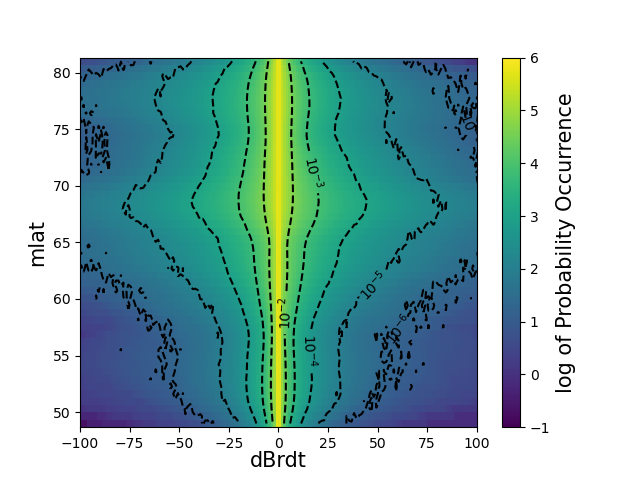

In [5]:
fig=plt.figure()
ax=fig.add_subplot()
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm = mpl.colors.Normalize(vmin=-1, vmax=6)), ax=ax)
cbar.set_label(r'log of Probability Occurrence', size=15)
ax.set_xlabel(r'$\frac{\delta \vec{J}_e}{\delta t}$ (nTmin$^{-1}$)', size=15, labelpad=0.05)
ax.set_ylabel(r'mlat ($^\circ$)', size=15)
def fmt(x):
    return r'$10^{{{:.0f}}}$'.format(x)

In [6]:
counts= data.count(binby=data.mlat, limits= [49-diff/2, 81+diff/2], shape=50 )

In [7]:
hist1= data.count(binby=[data.dBrdt, data.mlat], limits= [[-500, -0], [49-diff/2, 81+diff/2]], shape=(400, 50), array_type='xarray')/(counts)
hist1.attrs["units"] = "log(counts)"

In [8]:
hist2= data.count(binby=[data.dBrdt, data.mlat], limits= [[0, 500], [49-diff/2, 81+diff/2]], shape=(400, 50), array_type='xarray')/(counts)
hist2.attrs["units"] = "log(counts)"

In [9]:
np.log10(np.cumsum(hist1, axis=0)).plot.pcolormesh('dBrdt', 'mlat', ax=ax, xlim=[-100, 100], 
                                                 add_colorbar=False, 
                                                   vmin=-7, vmax=0)
np.log10(hist1).plot.contour('dBrdt', 'mlat', colors='black', zorder=100,levels = np.arange(-7,-1,1), xlim=[-100, 100])
np.log10(np.cumsum(hist2[::-1], axis=0)).plot.pcolormesh('dBrdt', 'mlat', ax=ax, xlim=[-100, 100],
                                                        vmin=-7, vmax=0, add_colorbar=False)
c=np.log10(hist2).plot.contour('dBrdt', 'mlat',colors='black', zorder=100,levels = np.arange(-7,-1,1), xlim=[-100, 100])
ax.clabel(c, c.levels, inline = True, fmt=fmt)

/home/simon/anaconda3/lib/python3.8/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/simon/anaconda3/lib/python3.8/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


<a list of 6 text.Text objects>